In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [95]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)
print(newsgroups_train.filenames.shape, newsgroups_train.target.shape, "\n")
print("\n".join(newsgroups_train.data[:3]))

(2034,) (2034,) 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq

In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())
print("Vector Shape :")
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
print(vectors.shape) #, vectors.nnz / vectors.shape[0], row_means.shape
print("Vector Shape vs newsgroup train data shape:")
print(len(newsgroups_train.data), vectors.shape)
vocab = np.array(vectorizer.get_feature_names())
print("vocab shape")
print(vocab.shape)
print(vocab[4000:4020])

Vector Shape :
(2034, 26576)
Vector Shape vs newsgroup train data shape:
2034 (2034, 26576)
vocab shape
(26576,)
['avalon' 'avatar' 'avation' 'ave' 'avenge' 'avenger' 'avenue' 'average'
 'averaged' 'averages' 'averaging' 'avergae' 'aversion' 'averted' 'avesta'
 'avestan' 'avg' 'avhrr' 'avi' 'aviation']


In [27]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 1min 24s


In [28]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [34]:
print(s[:4],"\n")
print(np.diag(s[:4]))

[433.92698542 291.51012741 240.71137677 220.00048043] 

[[433.92698542   0.           0.           0.        ]
 [  0.         291.51012741   0.           0.        ]
 [  0.           0.         240.71137677   0.        ]
 [  0.           0.           0.         220.00048043]]


In [45]:
# Confirm that U s Vh is a decomposition of vectors

reconstructed_vectors = U @ np.diag(s) @ Vh
print(np.allclose(reconstructed_vectors, vectors))

True
3.6236566821605322e-12


In [49]:
# Confirm that U Vh are orthonormal 

print(np.allclose(U.T @ U, np.eye(U.shape[0])))
print(np.allclose(Vh @ Vh.T, np.eye(U.shape[0])))

True
True


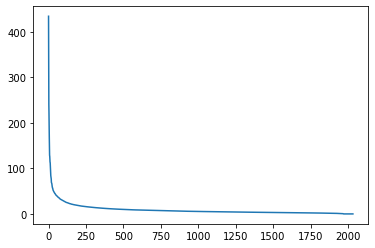

In [53]:
plt.plot(s)

In [75]:
num_top_words = 10

def show_topics(idx):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in idx])
    return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative salvadorans ahhh',
 'edu graphics data space pub mail 128 3d ray nasa',
 'space jesus launch god people satellite matthew atheists does time',
 'space launch satellite commercial nasa satellites market year data jpeg',
 'jpeg graphics space pub edu ray mail send launch file',
 'jesus matthew prophecy messiah psalm isaiah david said lord israel',
 'launch commercial satellite market image services satellites launches year communications',
 'data available nasa ftp grass anonymous contact gov vertex sgi',
 'atheists god religious atheism religion believe belief atheist image probe',
 'probe data surface moon mars probes lunar launch orbit venus']

### NMF From sklearn

In [85]:
m,n = vectors.shape
d = 5 #num of topics

clf = decomposition.NMF(n_components = d, random_state = 2)
W1 = clf.fit_transform(vectors)
H1 = clf.components_
print(W1.shape)
print(H1.shape)

(2034, 5)
(5, 26576)


In [90]:
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

## TF IDF

In [107]:
vectorizer_tfidf = TfidfVectorizer(stop_words = 'english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [109]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
show_topics(H1)

['people don think just like objective say morality know moral',
 'graphics thanks files image file program windows know format ftp',
 'space nasa launch shuttle orbit moon lunar earth station data',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew',
 'god jesus bible believe christian atheism does belief faith christians']

## Randomized SVD, Facebook SVD, and Originial SVD Time Comparison

In [110]:
%time u,s,v = np.linalg.svd(vectors,full_matrices=False)

Wall time: 1min 37s


In [112]:
from sklearn import decomposition
import fbpca

In [113]:
%time u,s,v = decomposition.randomized_svd(vectors,10)

Wall time: 20.7 s


In [114]:
%time us,s,v = fbpca.pca(vectors,10)

Wall time: 2.66 s
